In [29]:
import pandas as pd
from pathlib import Path

## Data

In [30]:
df=pd.read_excel('data/jyri/jyri_kysimused_v2.xlsx')

In [31]:
df.shape

(1619, 2)

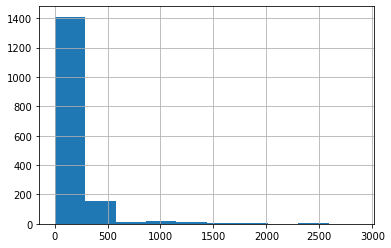

In [32]:
df['answer_n_toks']=df.answer.apply(lambda x: len(x.split()))
df.answer_n_toks.hist()

## Keep sentences if total nr of tokens less than indicated

In [33]:
def keep_ntoks(text, n_toks_max=60):
    sentences=text.split('. ')
    result_sentences=[]
    if len(sentences)>0:
        n_toks=0
        for sentence in sentences:
            toks=sentence.split()
            n_toks+=len(toks)
            if n_toks>n_toks_max:
                break
            result_sentences.append(sentence)
    return '. '.join(result_sentences)

In [34]:
df['answer_short']=df.answer.apply(keep_ntoks)

## We have very small amount of data. Valid set will base on train set

In [35]:
df_test=df.sample(10, random_state=1)

## Save

#### train

In [36]:
train_path=Path('data/jyri/train/')
valid_path=Path('data/jyri/valid/')
question_filename='question.txt'
answer_filename='answer.txt'

In [37]:
train_questions=' \n'.join(df.question.tolist())
train_answer=' \n'.join(df.answer_short.tolist())

In [38]:
(train_path/question_filename).write_text(train_questions)

861904

In [39]:
(train_path/answer_filename).write_text(train_answer)

507663

#### valid

In [40]:
valid_questions=' \n'.join(df_test.question.tolist())
valid_answer=' \n'.join(df_test.answer_short.tolist())

In [41]:
(valid_path/question_filename).write_text(valid_questions)

3725

In [42]:
(valid_path/answer_filename).write_text(valid_answer)

2799